In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Assignment Details 
You have to explore the Ames Housing dataset to predict house prices using regression techniques. You are required to apply **Simple Linear Regression**,** Multiple Linear Regression**, and **Polynomial Regression**. Additionally, implement necessary **preprocessing steps** to ensure accurate model performance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/ames-housing-dataset/AmesHousing.csv")

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Preprocessing 

In [5]:
df.shape

(2930, 82)

In [11]:
print(df.isnull().sum())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64


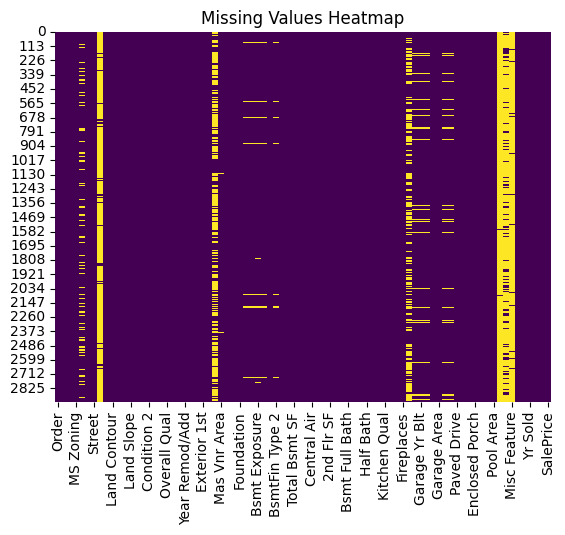

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [13]:
df.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Apply to each categorical column
for col in df.select_dtypes(include=['object', 'category']):
    df[col] = le.fit_transform(df[col])


In [25]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,5,141.0,31770,1,2,0,3,...,0,4,4,5,0,5,2010,9,4,215000
1,2,526350040,20,4,80.0,11622,1,2,3,3,...,0,4,2,5,0,6,2010,9,4,105000
2,3,526351010,20,5,81.0,14267,1,2,0,3,...,0,4,4,1,12500,6,2010,9,4,172000
3,4,526353030,20,5,93.0,11160,1,2,3,3,...,0,4,4,5,0,4,2010,9,4,244000
4,5,527105010,60,5,74.0,13830,1,2,0,3,...,0,4,2,5,0,3,2010,9,4,189900


In [31]:
corr_val = df.corrwith(df["SalePrice"], numeric_only = True)
corr_val.sort_values(ascending = False)

SalePrice        1.000000
Overall Qual     0.799262
Gr Liv Area      0.706780
Garage Cars      0.647877
Garage Area      0.640401
                   ...   
Fireplace Qu    -0.474762
Garage Finish   -0.549899
Kitchen Qual    -0.613689
Bsmt Qual       -0.619841
Exter Qual      -0.647616
Length: 82, dtype: float64

# Simple Linear Regression 
since `Overall Qual` is highly corelated with our target variable so we will only take `Overall Qual` as feature.

In [33]:
x = df['Overall Qual']
y = df['SalePrice']

In [36]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [40]:
x_train.shape

(2344,)

In [41]:
x_train = x_train.values.reshape(-1,1)

In [42]:
x_train.shape

(2344, 1)

In [45]:
x_test.shape

(586,)

In [46]:
x_test = x_test.values.reshape(-1,1)

In [47]:
x_test.shape

(586, 1)

In [43]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = slr.predict(x_test)
y_pred

array([264085.82617167, 175736.48451578, 219911.15534372,  87387.14285988,
       175736.48451578, 175736.48451578, 264085.82617167, 175736.48451578,
        87387.14285988, 264085.82617167, 219911.15534372, 264085.82617167,
        87387.14285988, 131561.81368783,  43212.47203193, 175736.48451578,
       175736.48451578, 219911.15534372, 131561.81368783, 175736.48451578,
       219911.15534372, 131561.81368783, 175736.48451578, 219911.15534372,
       219911.15534372, 264085.82617167, 352435.16782757, 219911.15534372,
       219911.15534372, 219911.15534372, 219911.15534372,  87387.14285988,
       264085.82617167,  87387.14285988, 175736.48451578,  87387.14285988,
       219911.15534372, 264085.82617167, 175736.48451578, 219911.15534372,
       308260.49699962, 175736.48451578, 219911.15534372, 175736.48451578,
       131561.81368783, 264085.82617167, 175736.48451578, 131561.81368783,
       131561.81368783, 131561.81368783, 219911.15534372, 131561.81368783,
       175736.48451578, 2

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred)*100)

MSE:  2796154624.8908944
MAE:  36141.2715466275
R2 Score:  65.12456615180709


# Multiple Linear Regression 

In [63]:
# Sort correlation values and save the result
corr_val = corr_val.sort_values(ascending=False)

# Select columns with correlation >= 0.5
selected_cols = corr_val[corr_val >= 0.5].index.tolist()

print("Highly correlated columns (>= 0.5):")
print(selected_cols)


Highly correlated columns (>= 0.5):
['SalePrice', 'Sale Condition', 'Sale Type', 'Yr Sold', 'Mo Sold', 'Misc Val', 'Misc Feature', 'Fence', 'Pool QC', 'Pool Area', 'Screen Porch', '3Ssn Porch']


In [65]:
x = df[selected_cols]
x

,SalePrice,Sale Condition,Sale Type,Yr Sold,Mo Sold,Misc Val,Misc Feature,Fence,Pool QC,Pool Area,Screen Porch,3Ssn Porch
0,215000,4,9,2010,5,0,5,4,4,0,0,0
1,105000,4,9,2010,6,0,5,2,4,0,120,0
2,172000,4,9,2010,6,12500,1,4,4,0,0,0
3,244000,4,9,2010,4,0,5,4,4,0,0,0
4,189900,4,9,2010,3,0,5,2,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2925,142500,4,9,2006,3,0,5,0,4,0,0,0
2926,131000,4,9,2006,6,0,5,2,4,0,0,0
2927,132000,4,9,2006,7,700,3,2,4,0,0,0
2928,170000,4,9,2006,4,0,5,4,4,0,0,0


In [66]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [67]:
y = df["SalePrice"]

In [69]:
x.shape, y.shape

((2930, 12), (2930,))

In [70]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [79]:
# trainig data pr prediction
y_pred_train = mlr.predict(x_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Multiple Linear Regression Results on Training Data")
print("MSE: ", mean_squared_error(y_train, y_pred_train))
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("R2 Score: ", r2_score(y_train, y_pred_train))

Multiple Linear Regression Results on Training Data
MSE:  1.4919995042578058e-20
MAE:  8.642217317205113e-11
R2 Score:  1.0


In [75]:
y_pred = mlr.predict(x_test)
y_pred

array([161000., 116000., 196500., 123600., 126000., 174190., 200000.,
       148500.,  88750., 409900., 235000., 246900.,  85500., 145000.,
        95000., 160500., 147000., 192500., 124000., 137500., 198900.,
       140000., 200000., 192500., 185000., 306000., 392000., 195000.,
       197900., 227680., 185900.,  87000., 201000., 103000., 128500.,
        75190., 176485., 274900., 187000., 260000., 342643., 240000.,
       263400., 183000., 120000., 350000., 185750., 155000., 171500.,
       125000., 162900., 134500., 134500., 150000., 213133., 190550.,
       180000., 118000., 210900., 133500.,  60000., 144000.,  84500.,
       337500., 246500., 185000., 135000., 241500., 151000., 199500.,
       167500., 191000., 318000.,  80000., 132000., 402861., 158000.,
       235128., 148000., 180500., 170000., 119000., 139500., 195000.,
       286000., 177000., 128000., 141000., 203160., 184750., 204500.,
        79000., 137500.,  59000., 190000., 177439.,  44000., 245000.,
       215700., 2559

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Multiple Linear Regression Results on Testing Data")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred)*100)

Multiple Linear Regression Results on Testing Data
MSE:  2.0172591932289783e-20
MAE:  9.934289568443957e-11
R2 Score:  100.0


# Polynomial Linear Regression 

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
plr = PolynomialFeatures(degree=2)
x_trainP = plr.fit_transform(x_train)
x_testP = plr.fit_transform(x_test)

In [83]:
plrModel = LinearRegression()
plrModel.fit(x_trainP, y_train)

LinearRegression()

In [85]:
y_pred_train = plrModel.predict(x_trainP)
y_pred_train

array([152000.00000367, 184999.99999802, 101800.00000808, ...,
       207499.99999771, 122250.00000592, 133900.00000523])

In [84]:
y_pred = plrModel.predict(x_testP)
y_pred

array([161000.00000241, 116000.00000633, 196499.99999911, 123600.00000593,
       126000.00000555, 174190.0000007 , 199999.99999921, 148500.00000374,
        88750.00000868, 409899.99996467, 234999.99999507, 246899.9999944 ,
        85500.00000849, 145000.00000535,  95000.00000975, 160500.00000413,
       147000.0000039 , 192499.99999936, 124000.00000578, 137500.00000654,
       198899.99999857, 140000.00000641, 199999.99999873, 192500.00000057,
       184999.99999666, 305999.99998308, 391999.99996764, 194999.99999858,
       197900.00000018, 227679.99999447, 185900.0000005 ,  87000.00000872,
       200999.99999833, 103000.00000921, 128500.00000093,  75190.00000925,
       176485.00000057, 274899.9999931 , 186999.99999982, 259999.99999067,
       342642.99997771, 239999.9999926 , 263399.9999906 , 182999.99999999,
       120000.00000828, 349999.99997789, 185750.00000019, 155000.00000344,
       171500.00000168, 125000.00000561, 162900.00000776, 134500.00000503,
       134500.00000618, 1

In [87]:
print("For Polynomial Degree = 2 ")
print("results on Training dataset")
print()
print("MSE: ",mean_squared_error(y_train, y_pred_train))
print("MAE: ",mean_absolute_error(y_train, y_pred_train))
print("R2 Score: ", r2_score(y_train, y_pred_train))
print()
print("results on Testing dataset")
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print()

For Polynomial Degree = 2 
results on Training dataset

MSE:  1.173578639613625e-10
MAE:  6.884714985869661e-06
R2 Score:  1.0

results on Testing dataset
MSE:  5.313095482715916e-09
MAE:  1.118452935944448e-05
R2 Score:  1.0



In [88]:
plr = PolynomialFeatures(degree=3)
x_trainP = plr.fit_transform(x_train)
x_testP = plr.fit_transform(x_test)

plrModel = LinearRegression()
plrModel.fit(x_trainP, y_train)

y_pred_train = plrModel.predict(x_trainP)
y_pred_train

y_pred = plrModel.predict(x_testP)
y_pred

print("For Polynomial Degree = 3 ")
print("results on Training dataset")
print()
print("MSE: ",mean_squared_error(y_train, y_pred_train))
print("MAE: ",mean_absolute_error(y_train, y_pred_train))
print("R2 Score: ", r2_score(y_train, y_pred_train))
print()
print("results on Testing dataset")
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print()

For Polynomial Degree = 3 
results on Training dataset

MSE:  0.009317332484960155
MAE:  0.0389122150825816
R2 Score:  0.9999999999984329

results on Testing dataset
MSE:  3988056250.5517087
MAE:  2608.8498118438642
R2 Score:  0.5025840462795743



In [89]:
plr = PolynomialFeatures(degree=4)
x_trainP = plr.fit_transform(x_train)
x_testP = plr.fit_transform(x_test)

plrModel = LinearRegression()
plrModel.fit(x_trainP, y_train)

y_pred_train = plrModel.predict(x_trainP)
y_pred_train

y_pred = plrModel.predict(x_testP)
y_pred

print("For Polynomial Degree = 4 ")
print("results on Training dataset")
print()
print("MSE: ",mean_squared_error(y_train, y_pred_train))
print("MAE: ",mean_absolute_error(y_train, y_pred_train))
print("R2 Score: ", r2_score(y_train, y_pred_train))
print()
print("results on Testing dataset")
print("MSE: ",mean_squared_error(y_test, y_pred))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

print()

For Polynomial Degree = 4 
results on Training dataset

MSE:  131.9573163605579
MAE:  5.468855976018515
R2 Score:  0.9999999778064068

results on Testing dataset
MSE:  4807412594.026809
MAE:  2873.079038382441
R2 Score:  0.40038866802477513



# Final Thoughts

Now the model is not improving after the 2 degree of polynomail,if we increase the degree after 3 the model will start underfitting.
